<a href="https://colab.research.google.com/github/DenisseO/bg_course/blob/main/ciencia_datos_desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Desafío de Ciencia de Datos: Banco Alfa

Bienvenidos al desafío. En este notebook, trabajarán con un dataset del Banco Alfa para completar las diferentes etapas del pipeline de ciencia de datos.

## Objetivo
Resolver uno de los problemas estratégicos del banco utilizando técnicas de ciencia de datos.

El dataset incluye información sobre clientes y su comportamiento financiero, y se usará para las siguientes etapas:
1. Definición del problema.
2. Recolección y exploración de datos.
3. Preparación de datos.
4. Modelado.
5. Evaluación.

¡Buena suerte!


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Paso 1: Definición del Problema

In [176]:
# Carga del dataset
file_path = "biased_bank_dataset_40002.csv"  # Asegúrate de que este archivo esté en la misma carpeta que el notebook
df = pd.read_csv(file_path)


## Paso 2: Recolección y Exploración de Datos

En esta etapa, analizarán los datos para entender su estructura y calidad.
Incluyan:
- Identificación de valores faltantes.
- Estadísticas básicas.
- Visualizaciones iniciales para las principales variables.


In [ ]:
# Identificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

In [ ]:
# Estadísticas básicas
print("Estadísticas descriptivas:")
df.describe()


## Paso 3: Preparación de Datos

En esta etapa:
1. Limpien los datos.
2. Creen variables adicionales útiles para el análisis.
3. Escalen o transformen las variables si es necesario.


In [ ]:
# Ejemplo de limpieza y preparación de datos
# Remplazar valores nulos (si existieran)
df[columns] = df[columns].fillna(0)

In [ ]:
# Crear una nueva variable!!



In [89]:
# Escalar variables relevantes
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#df[['Ingresos', 'DeudaIngreso']] = scaler.fit_transform(df[['Ingresos', 'DeudaIngreso']])
#df.head()


## Paso 4: Modelado

Entrenen un modelo utilizando las variables disponibles.
1. Seleccionen las variables predictoras.
2. Dividan los datos en entrenamiento y prueba.
3. Entrenen un modelo inicial (por ejemplo, regresión logística o árbol de decisión).


In [ ]:
df['SeAtrasoMasDeUnaVez'].value_counts()

In [ ]:
df['SeAtrasoMasDeUnaVez'].value_counts(normalize=True)

## SPLIT TRAIN AND TEST

In [ ]:
df.columns

In [197]:
# Dividir en entrenamiento y prueba
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score
df.fillna(0,  inplace=True)
X = df[[columnas]]
y = df['SeAtrasoMasDeUnaVez']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# MODELING

In [198]:
# Entrenar un modelo (árbol de decisión)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)


## METRICS

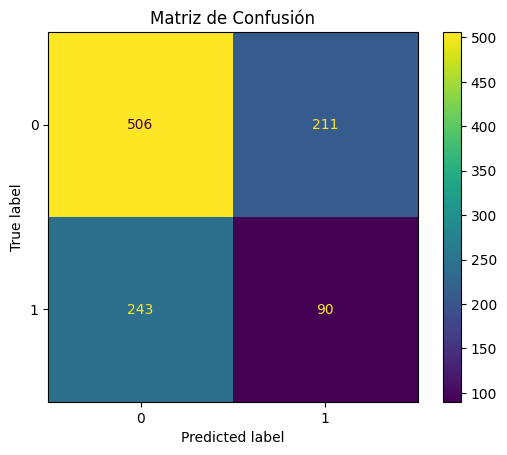

In [183]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title('Matriz de Confusión')
plt.show()

## ROC curve

In [ ]:
# Calcular y mostrar la curva ROC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener probabilidades para el conjunto de prueba
y_proba = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Tunning

In [199]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

In [ ]:
y_pred = grid_search.predict(X_test)
y_pred_prob = grid_search.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Calcular el AUC
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_prob)}")

## Variables importantes

In [ ]:
# Mostrar las variables más importantes
if hasattr(grid_search.best_estimator_, "feature_importances_"):
    import pandas as pd
    feature_importances = grid_search.best_estimator_.feature_importances_
    importance_df = pd.DataFrame({
        'Variable': X.columns,
        'Importancia': feature_importances
    }).sort_values(by='Importancia', ascending=False)

    print("Variables más importantes en el modeloo:")
    print(importance_df)
else:
    print("El modelo no soporta cálculo de importancia de variables.")


## Paso 5: Evaluación

Analicen el desempeño del modelo. Respondan:
- ¿Qué tan efectivo es el modelo?
- ¿Cuáles son las métricas más importantes para el negocio?


In [ ]:

predicted_probabilities = grid_search.predict_proba([single_observation])[0]